# Feature Extraction from Text

This notebook is divided into two sections:
* First, we'll find out what what is necessary to build an NLP system that can turn a body of text into a numerical array of *features* by manually calcuating frequencies and building out TF-IDF.
* Next we'll show how to perform these steps using scikit-learn tools.

# Part One: Core Concepts on Feature Extraction


In this section we'll use basic Python to build a rudimentary NLP system. We'll build a *corpus of documents* (two small text files), create a *vocabulary* from all the words in both documents, and then demonstrate a *Bag of Words* technique to extract features from each document.<br>
<div class="alert alert-info" style="margin: 20px">This first section is for illustration only!
<br>Don't worry about memorizing this code - later on we will let Scikit-Learn Preprocessing tools do this for us.</div>

## Start with some documents:
For simplicity we won't use any punctuation in the text files One.txt and Two.txt. Let's quickly open them and read them. Keep in mind, you should avoid opening and reading entire files if they are very large, as Python could just display everything depending on how you open the file.


### Reading entire text as a string

In [15]:
# It will return string
with open ('One.txt') as mytext:
    a = mytext.read()

In [16]:
# Here we can we that \n on end of line 
a

'This is a story about dogs\nour canine pets\nDogs are furry animals\n'

In [17]:
# for that we have to use 
print(a)

This is a story about dogs
our canine pets
Dogs are furry animals



### Reading Each Line as a List

In [27]:
# or we can try this and this will return list
with open ('One.txt') as mytext:
    b = mytext.readlines()

In [28]:
# Its showing in seprarte lines but still showing \n
b

['This is a story about dogs\n',
 'our canine pets\n',
 'Dogs are furry animals\n']

In [29]:
print(b)

['This is a story about dogs\n', 'our canine pets\n', 'Dogs are furry animals\n']


In [30]:

type(a),type(b)

(str, list)

In [32]:
# b is sting not list
b.lower().split()

AttributeError: 'list' object has no attribute 'lower'

### Reading in Words Separately

In [19]:
a.lower().split()

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

## Building a vocabulary (Creating a "Bag of Words")

Let's create dictionaries that correspond to unique mappings of the words in the documents. We can begin to think of this as mapping out all the possible words available for all (both) documents.

In [33]:
with open('one.txt') as f:
    words_one = f.read().lower().split()

In [34]:
words_one

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [35]:
len(words_one)

13

In [38]:
# If we want unique words from it we have to use set()
uni_words_one = set(words_one)
uni_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

**Repeat for Two.txt**

In [39]:
with open('Two.txt') as f:
    words_two = f.read().lower().split()
    uni_words_two = set(words_two)

In [40]:
uni_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

**Get all unique words across all documents**

In [41]:
all_uni_words = set()
all_uni_words.update(uni_words_one)
all_uni_words.update(uni_words_two)

In [42]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [43]:
full_vocab = dict()
i = 0
for word in all_uni_words:
    full_vocab[word] = i
    i = i+1

In [46]:
# Do not expect this to be in alphabetical order! 
# The for loop goes through the set() in the most efficient way possible, not in alphabetical order!
full_vocab

{'this': 0,
 'are': 1,
 'a': 2,
 'is': 3,
 'dogs': 4,
 'about': 5,
 'sport': 6,
 'surfing': 7,
 'catching': 8,
 'our': 9,
 'pets': 10,
 'water': 11,
 'animals': 12,
 'waves': 13,
 'story': 14,
 'popular': 15,
 'furry': 16,
 'canine': 17,
 'fun': 18}

## Bag of Words to Frequency Counts

Now that we've encapsulated our "entire language" in a dictionary, let's perform *feature extraction* on each of our original documents:

**Empty counts per doc**

In [48]:
# Create an empty vector with space for each word in the vocabulary:
one_freq = [0]*len(full_vocab)
two_freq = [0]*len(full_vocab)
all_words = ['']*len(full_vocab)

In [49]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
two_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [51]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

**Add in counts per word per doc:**

In [56]:
# map the frequencies of each word in 1.txt to our vector:
with open('One.txt') as f:
    one_text = f.read().lower().split()
    
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] += 1

In [57]:
one_freq

[1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

In [58]:
# Do the same for the second document:
with open('Two.txt') as f:
    two_text = f.read().lower().split()
    
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind]+=1

In [59]:
two_freq

[1, 0, 1, 3, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]

In [61]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [62]:
all_words

['this',
 'are',
 'a',
 'is',
 'dogs',
 'about',
 'sport',
 'surfing',
 'catching',
 'our',
 'pets',
 'water',
 'animals',
 'waves',
 'story',
 'popular',
 'furry',
 'canine',
 'fun']

In [64]:
import pandas as pd

In [66]:
bow = pd.DataFrame(data=[one_freq,two_freq],columns=all_words)

In [67]:
bow

,this,are,a,is,dogs,about,sport,surfing,catching,our,pets,water,animals,waves,story,popular,furry,canine,fun
0,1,1,1,1,2,1,0,0,0,1,1,0,1,0,1,0,1,1,0
1,1,0,1,3,0,1,1,2,1,0,0,1,0,1,1,1,0,0,1


By comparing the vectors we see that some words are common to both, some appear only in `One.txt`, others only in `Two.txt`. Extending this logic to tens of thousands of documents, we would see the vocabulary dictionary grow to hundreds of thousands of words. Vectors would contain mostly zero values, making them **sparse matrices**.


# Concepts to Consider:

## Bag of Words and Tf-idf
In the above examples, each vector can be considered a *bag of words*. By itself these may not be helpful until we consider *term frequencies*, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider *inverse document frequency*, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency).

Together these terms become [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Stop Words and Word Stems
Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say `cat` in place of both `cat` and `cats`. This will shrink our vocab array and improve performance.

## Tokenization and Tagging
When we created our vectors the first thing we did was split the incoming text on whitespace with `.split()`. This was a crude form of *tokenization* - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated *morphology* to parse text appropriately.

Once the text is divided, we can go back and *tag* our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become ***high dimensional sparse matrices***.

# Part Two:  Feature Extraction with Scikit-Learn

Let's explore the more realistic process of using sklearn to complete the tasks mentioned above!

# Scikit-Learn's Text Feature Extraction Options

In [70]:
text = ['This is a line',
           "This is another line",
       "Completely different line"]

## CountVectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer,CountVectorizer

In [73]:
cv = CountVectorizer()

In [74]:
cv.fit_transform(text)

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [75]:
sparse_mat = cv.fit_transform(text)

In [76]:
sparse_mat.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [77]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

## TfidfTransformer

TfidfVectorizer is used on sentences, while TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer

In [78]:
tfidf_transformer = TfidfTransformer()

In [79]:
cv = CountVectorizer()

In [80]:
counts = cv.fit_transform(text)

In [81]:
counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [82]:
tfidf = tfidf_transformer.fit_transform(counts)

In [83]:
tfidf.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipe = Pipeline([('cv',CountVectorizer()),('tfidf',TfidfTransformer())])

In [86]:
results = pipe.fit_transform(text)

In [87]:
results

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [88]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

## TfIdfVectorizer

Does both above in a single step!

In [89]:
tfidf = TfidfVectorizer()

In [90]:
new = tfidf.fit_transform(text)

In [91]:
new.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

# NLP and Supervised Learning
## Classification of Text Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\20 - Naive Bayes Classification and Natural Language Processing\\31640102-airline-tweets.csv")

In [94]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot: xlabel='airline', ylabel='count'>

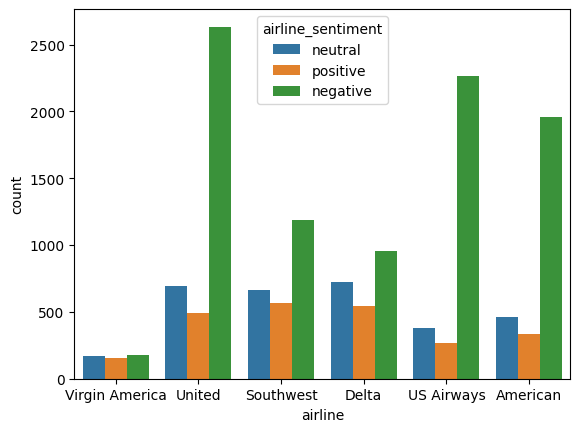

In [95]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

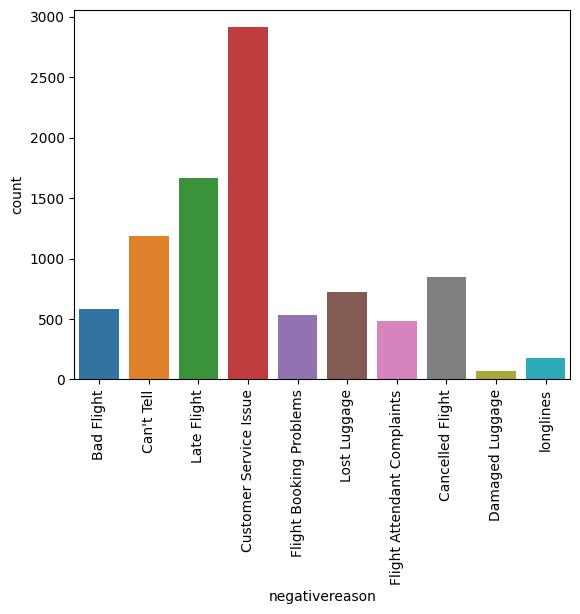

In [96]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

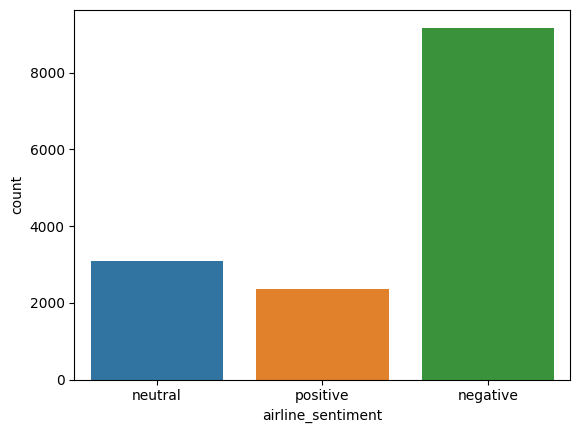

In [97]:
sns.countplot(data=df,x='airline_sentiment')

In [98]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Features and Label

In [99]:
data = df[['airline_sentiment','text']]

In [100]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [101]:
X = df['text']
y = df['airline_sentiment']

### Train Test Split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Vectorization

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
tfidf = TfidfVectorizer(stop_words='english')

In [110]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [112]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [113]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**DO NOT USE .todense() for such a large sparse matrix!!!**

## Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC 

In [114]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [115]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [117]:
from sklearn.svm import LinearSVC,SVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [118]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

## Performance Evaluation

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
from mlxtend.plotting import plot_confusion_matrix

In [127]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    mm= confusion_matrix(y_test,preds)
    plot_confusion_matrix(mm,colorbar=True)

NB MODEL
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



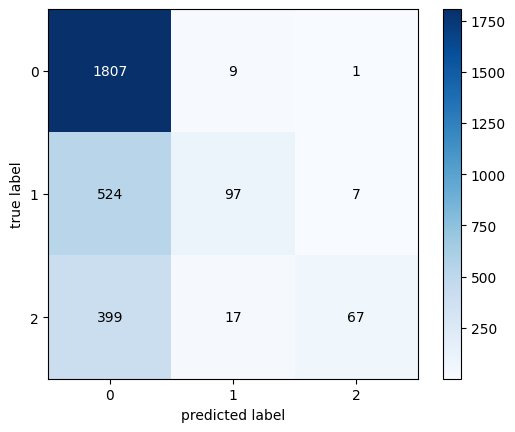

In [128]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



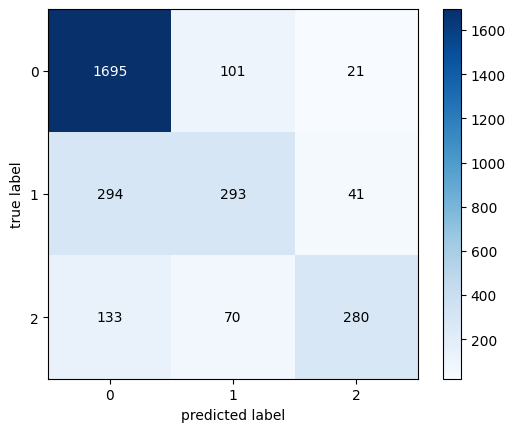

In [129]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



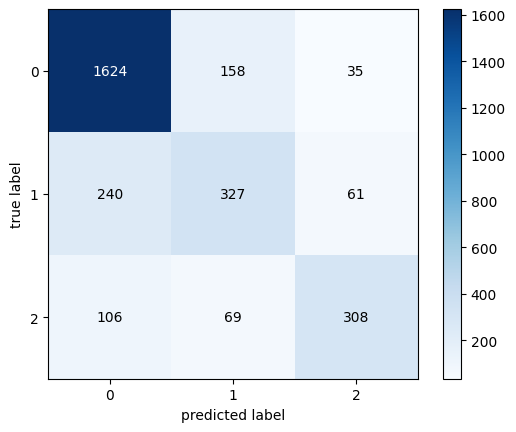

In [130]:
print('SVC')
report(svc)

### Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [131]:
from sklearn.pipeline import Pipeline

In [132]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [133]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [134]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [135]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [136]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)